In [1]:

import pandas as pd #data processing
import numpy as np #linear_algebra
import matplotlib.pyplot as plt #visual
import seaborn as sns #visual
import warnings
warnings.filterwarnings('ignore')
#Handling text 
import nltk
nltk.download('stopwords')
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS
#machine learning preprocessing & classification models
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score,accuracy_score,classification_report,plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_csv('/kaggle/input/finaldata/fake_job_postings.csv')
data.head(10)

job_id                                      title               location  \
0       1                           Marketing Intern       US, NY, New York   
1       2  Customer Service - Cloud Video Production         NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)          US, IA, Wever   
3       4          Account Executive - Washington DC     US, DC, Washington   
4       5                        Bill Review Manager     US, FL, Fort Worth   
5       6                           Accounting Clerk               US, MD,    
6       7                      Head of Content (m/f)         DE, BE, Berlin   
7       8           Lead Guest Service Specialist     US, CA, San Francisco   
8       9                                 HP BSM SME      US, FL, Pensacola   
9      10    Customer Service Associate - Part Time         US, AZ, Phoenix   

   department salary_range                                    company_profile  \
0   Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1     Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2         NaN          NaN  Valor Services provides Workforce Solutions th...   
3       Sales          NaN  Our passion for improving quality of life thro...   
4         NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   
5         NaN          NaN                                                NaN   
6  ANDROIDPIT  20000-28000  Founded in 2009, the Fonpit AG rose with its i...   
7         NaN          NaN  Airenvy’s mission is to provide lucrative yet ...   
8         NaN          NaN  Solutions3 is a woman-owned small business who...   
9         NaN          NaN  Novitex Enterprise Solutions, formerly Pitney ...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   
5  Job OverviewApex is an environmental consultin...   
6  Your Responsibilities: Manage the English-spea...   
7  Who is Airenvy?Hey there! We are seasoned entr...   
8  Implementation/Configuration/Testing/Training ...   
9  The Customer Service Associate will be based i...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   
5                                                NaN   
6  Your Know-How:                                ...   
7  Experience with CRM software, live chat, and p...   
8  MUST BE A US CITIZEN.An active TS/SCI clearanc...   
9  Minimum Requirements:Minimum of 6 months custo...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   
5                                                NaN              0   
6  Your Benefits: Being part of a fast-growing co...              0   
7  Competitive Pay. You'll be able to eat steak e...              0   
8                                                NaN              0   
9                                                NaN              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2  

In [3]:
data.dtypes.to_frame()


0
job_id                int64
title                object
location             object
department           object
salary_range         object
company_profile      object
description          object
requirements         object
benefits             object
telecommuting         int64
has_company_logo      int64
has_questions         int64
employment_type      object
required_experience  object
required_education   object
industry             object
function             object
fraudulent            int64

In [4]:
categories=['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','fraudulent']

In [5]:
for i in categories:
     x=data[i].value_counts()
     print (x.to_frame())
    

   telecommuting
0          17489
1            799
   has_company_logo
1             14176
0              4112
   has_questions
0           9482
1           8806
           employment_type
Full-time            11825
Contract              1525
Part-time              859
Other                  245
Temporary              234
                  required_experience
Mid-Senior level                 3800
Entry level                      2853
Associate                        2300
Not Applicable                   1163
Director                          388
Internship                        380
Executive                         144
                                   required_education
Bachelor's Degree                                5105
High School or equivalent                        2190
Unspecified                                      1490
Master's Degree                                   420
Associate Degree                                  271
Certification                                   

In [6]:
data.isna().sum()

job_id                     0
title                      0
location                 365
department             11865
salary_range           15289
company_profile         3764
description                1
requirements            2845
benefits                7425
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3600
required_experience     7260
required_education      8333
industry                5062
function                6620
fraudulent                 0
dtype: int64

(array([5.00000e-01, 2.06500e+02, 4.12500e+02, 6.18500e+02, 8.24500e+02,
        1.03050e+03, 1.23650e+03, 1.44250e+03, 1.64850e+03, 1.85450e+03,
        2.06050e+03, 2.26650e+03, 2.47250e+03, 2.67850e+03, 2.88450e+03,
        3.09050e+03, 3.29650e+03, 3.50250e+03, 3.70850e+03, 3.91450e+03,
        4.12050e+03, 4.32650e+03, 4.53250e+03, 4.73850e+03, 4.94450e+03,
        5.15050e+03, 5.35650e+03, 5.56250e+03, 5.76850e+03, 5.97450e+03,
        6.18050e+03, 6.38650e+03, 6.59250e+03, 6.79850e+03, 7.00450e+03,
        7.21050e+03, 7.41650e+03, 7.62250e+03, 7.82850e+03, 8.03450e+03,
        8.24050e+03, 8.44650e+03, 8.65250e+03, 8.85850e+03, 9.06450e+03,
        9.27050e+03, 9.47650e+03, 9.68250e+03, 9.88850e+03, 1.00945e+04,
        1.03005e+04, 1.05065e+04, 1.07125e+04, 1.09185e+04, 1.11245e+04,
        1.13305e+04, 1.15365e+04, 1.17425e+04, 1.19485e+04, 1.21545e+04,
        1.23605e+04, 1.25665e+04, 1.27725e+04, 1.29785e+04, 1.31845e+04,
        1.33905e+04, 1.35965e+04, 1.38025e+04, 1.40

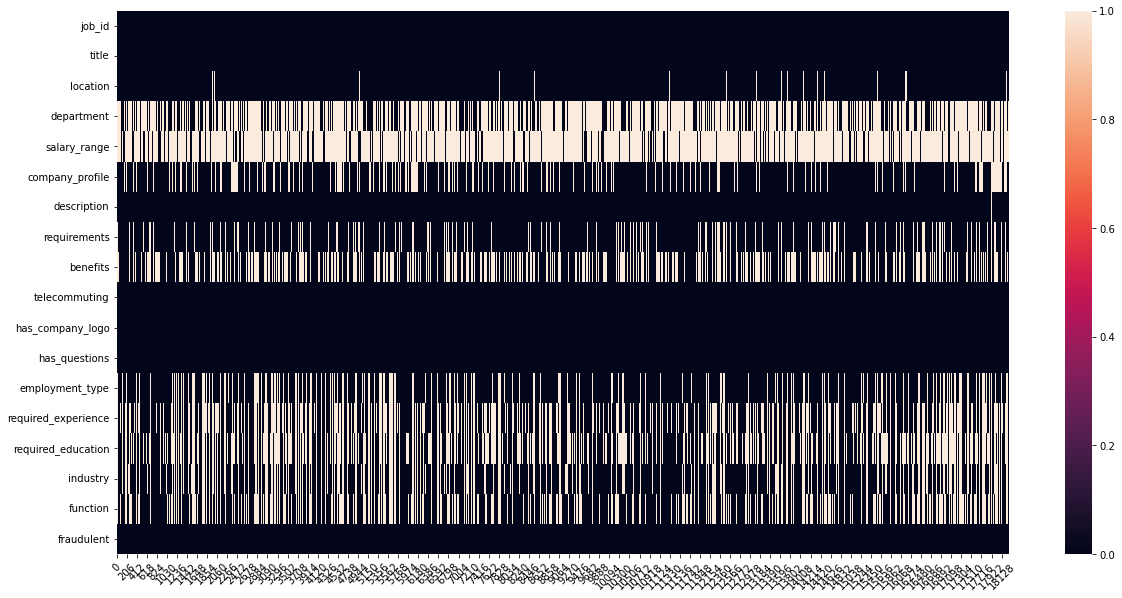

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna().transpose())
plt.xticks(rotation=45)

In [8]:
#Removing undesired columns & nan 
data.function.fillna(data.department,inplace=True)
data.drop(columns=['job_id','salary_range','department'],inplace=True)

In [9]:
#Now we need to handle missing values for text data and categorical data

text=['title','benefits','company_profile','location','description','requirements','fraudulent']

categ=['employment_type','required_experience','required_education','industry','function','telecommuting','has_company_logo','has_questions','fraudulent']

In [10]:
#filling nan in categorical data
categ_cols=data[categ].fillna('None')
categ_cols

employment_type required_experience required_education  \
0               Other          Internship               None   
1           Full-time      Not Applicable               None   
2                None                None               None   
3           Full-time    Mid-Senior level  Bachelor's Degree   
4           Full-time    Mid-Senior level  Bachelor's Degree   
...               ...                 ...                ...   
18283       Full-time    Mid-Senior level               None   
18284       Full-time    Mid-Senior level  Bachelor's Degree   
18285       Full-time                None               None   
18286        Contract      Not Applicable       Professional   
18287       Full-time    Mid-Senior level               None   

                        industry              function  telecommuting  \
0                           None             Marketing              0   
1      Marketing and Advertising      Customer Service              0   
2                           None                  None              0   
3              Computer Software                 Sales              0   
4         Hospital & Health Care  Health Care Provider              0   
...                          ...                   ...            ...   
18283          Computer Software                 Sales              0   
18284                   Internet   Accounting/Auditing              0   
18285                       None                  None              0   
18286             Graphic Design                Design              0   
18287          Computer Software           Engineering              0   

       has_company_logo  has_questions  fraudulent  
0                     1              0           0  
1                     1              0           0  
2                     1              0           0  
3                     1              0           0  
4                     1              1           0  
...                 ...            ...         ...  
18283                 1              1           0  
18284                 1              1           0  
18285                 0              0           0  
18286                 0              1           0  
18287                 1              1           0  

[18288 rows x 9 columns]

In [11]:
#filling nan in text data
txt_cols=data[text].fillna(' ')
txt_cols

title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
18283                   Account Director - Distribution    
18284                                 Payroll Accountant   
18285  Project Cost Control Staff Engineer - Cost Con...   
18286                                   Graphic Designer   
18287                         Web Application Developers   

                                                benefits  \
0                                                          
1      What you will get from usThrough being part of...   
2                                                          
3      Our culture is anything but corporate—we have ...   
4                                  Full Benefits Offered   
...                                                  ...   
18283  What can you expect from us?We have an open cu...   
18284  Health &amp; WellnessMedical planPrescription ...   
18285                                                      
18286  Competitive salary (compensation will be based...   
18287                                                      

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      Valor Services provides Workforce Solutions th...   
3      Our passion for improving quality of life thro...   
4      SpotSource Solutions LLC is a Global Human Cap...   
...                                                  ...   
18283  Vend is looking for some awesome new talent to...   
18284  WebLinc is the e-commerce platform and service...   
18285  We Provide Full Time Permanent Positions for m...   
18286                                                      
18287  Vend is looking for some awesome new talent to...   

                   location  \
0          US, NY, New York   
1            NZ, , Auckland   
2             US, IA, Wever   
3        US, DC, Washington   
4        US, FL, Fort Worth   
...                     ...   
18283       CA, ON, Toronto   
18284  US, PA, Philadelphia   
18285       US, TX, Houston   
18286         NG, LA, Lagos   
18287     NZ, N, Wellington   

                                             description  \
0      Food52, a fast-growing, James Beard Award-winn...   
1      Organised - Focused - Vibrant - Awesome!Do you...   
2      Our client, located in Houston, is actively se...   
3      THE COMPANY: ESRI – Environmental Systems Rese...   
4      JOB TITLE: Itemization Review ManagerLOCATION:...   
...                                                  ...   
18283  Just in case this is the first time you’ve vis...   
18284  The Payroll Accountant will focus primarily on...   
18285  Experienced Project Cost Control Staff Enginee...   
18286  Nemsia Studios is looking for an experienced v...   
18287  Who are we?Vend is an award winning web based ...   

                                            requirements  fraudulent  
0      Experience with content management systems a m...           0  
1      What we expect from you:Your key responsibilit...           0  
2      Implement pre-commissioning and commissioning ...           0  
3      EDUCATION: Bachelor’s or Master’s in GIS, busi...           0  
4      QUALIFICATIONS:RN license in the State of Texa...           0  
...                                                  ...         ...  
18283  To ace this role you:Will eat comprehensive St...           0  
18284  - B.A. or B.S. in Accounting- Desire to have f...           0  
18285  At least 12 years professional experience.Abil...           0  
18286  1. Must be fluent in the latest versions of Co...           0  
18287  We wan

### Getting country names from location
#### we found that we have 91 Countries

In [12]:
categ_cols['country']=txt_cols['location'].apply(lambda x:x.split(',')[0])
countries=categ_cols['country'].value_counts().to_frame()
countries

country
US    11036
GB     2380
GR      928
CA      459
DE      380
..      ...
SI        1
CO        1
PE        1
SD        1
KH        1

[91 rows x 1 columns]

## Exploratory Data Analysis (Let's get Some Insights !)



- ###   Univariate Analysis for Target values


In [13]:
data['fraudulent'].value_counts().to_frame()

fraudulent
0       16819
1        1469

([<matplotlib.patches.Wedge at 0x7a277a68aa50>,
 [Text(-1.0651608356600877, 0.2746495843359383, 'Real Job'),
  Text(1.0651608292314498, -0.2746496092678273, 'Fake Job')],
 [Text(-0.5809968194509568, 0.14980886418323905, '92%'),
  Text(0.5809968159444271, -0.14980887778245122, '8%')])

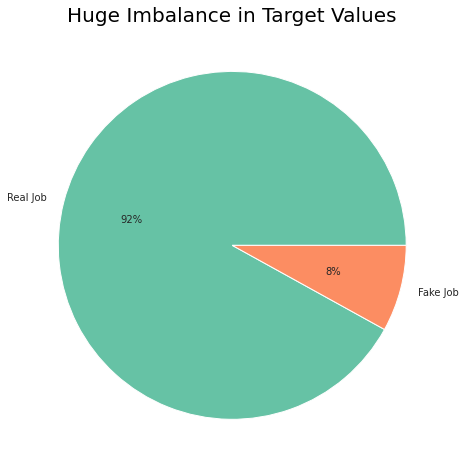

In [14]:
colors = sns.color_palette('Set2')[0:10]
labels=['Real Job','Fake Job']
plt.figure(figsize=(10,8))
plt.title('Huge Imbalance in Target Values',size=20)
sns.set_style('whitegrid')
plt.pie(data['fraudulent'].value_counts(),labels=labels,colors=colors,autopct='%.0f%%')

- ### Categorical Data and Target

In [15]:
fakejobs=categ_cols[categ_cols['fraudulent']==1]
realjobs=categ_cols[categ_cols['fraudulent']==0]

Text(0.5, 0, 'Function')

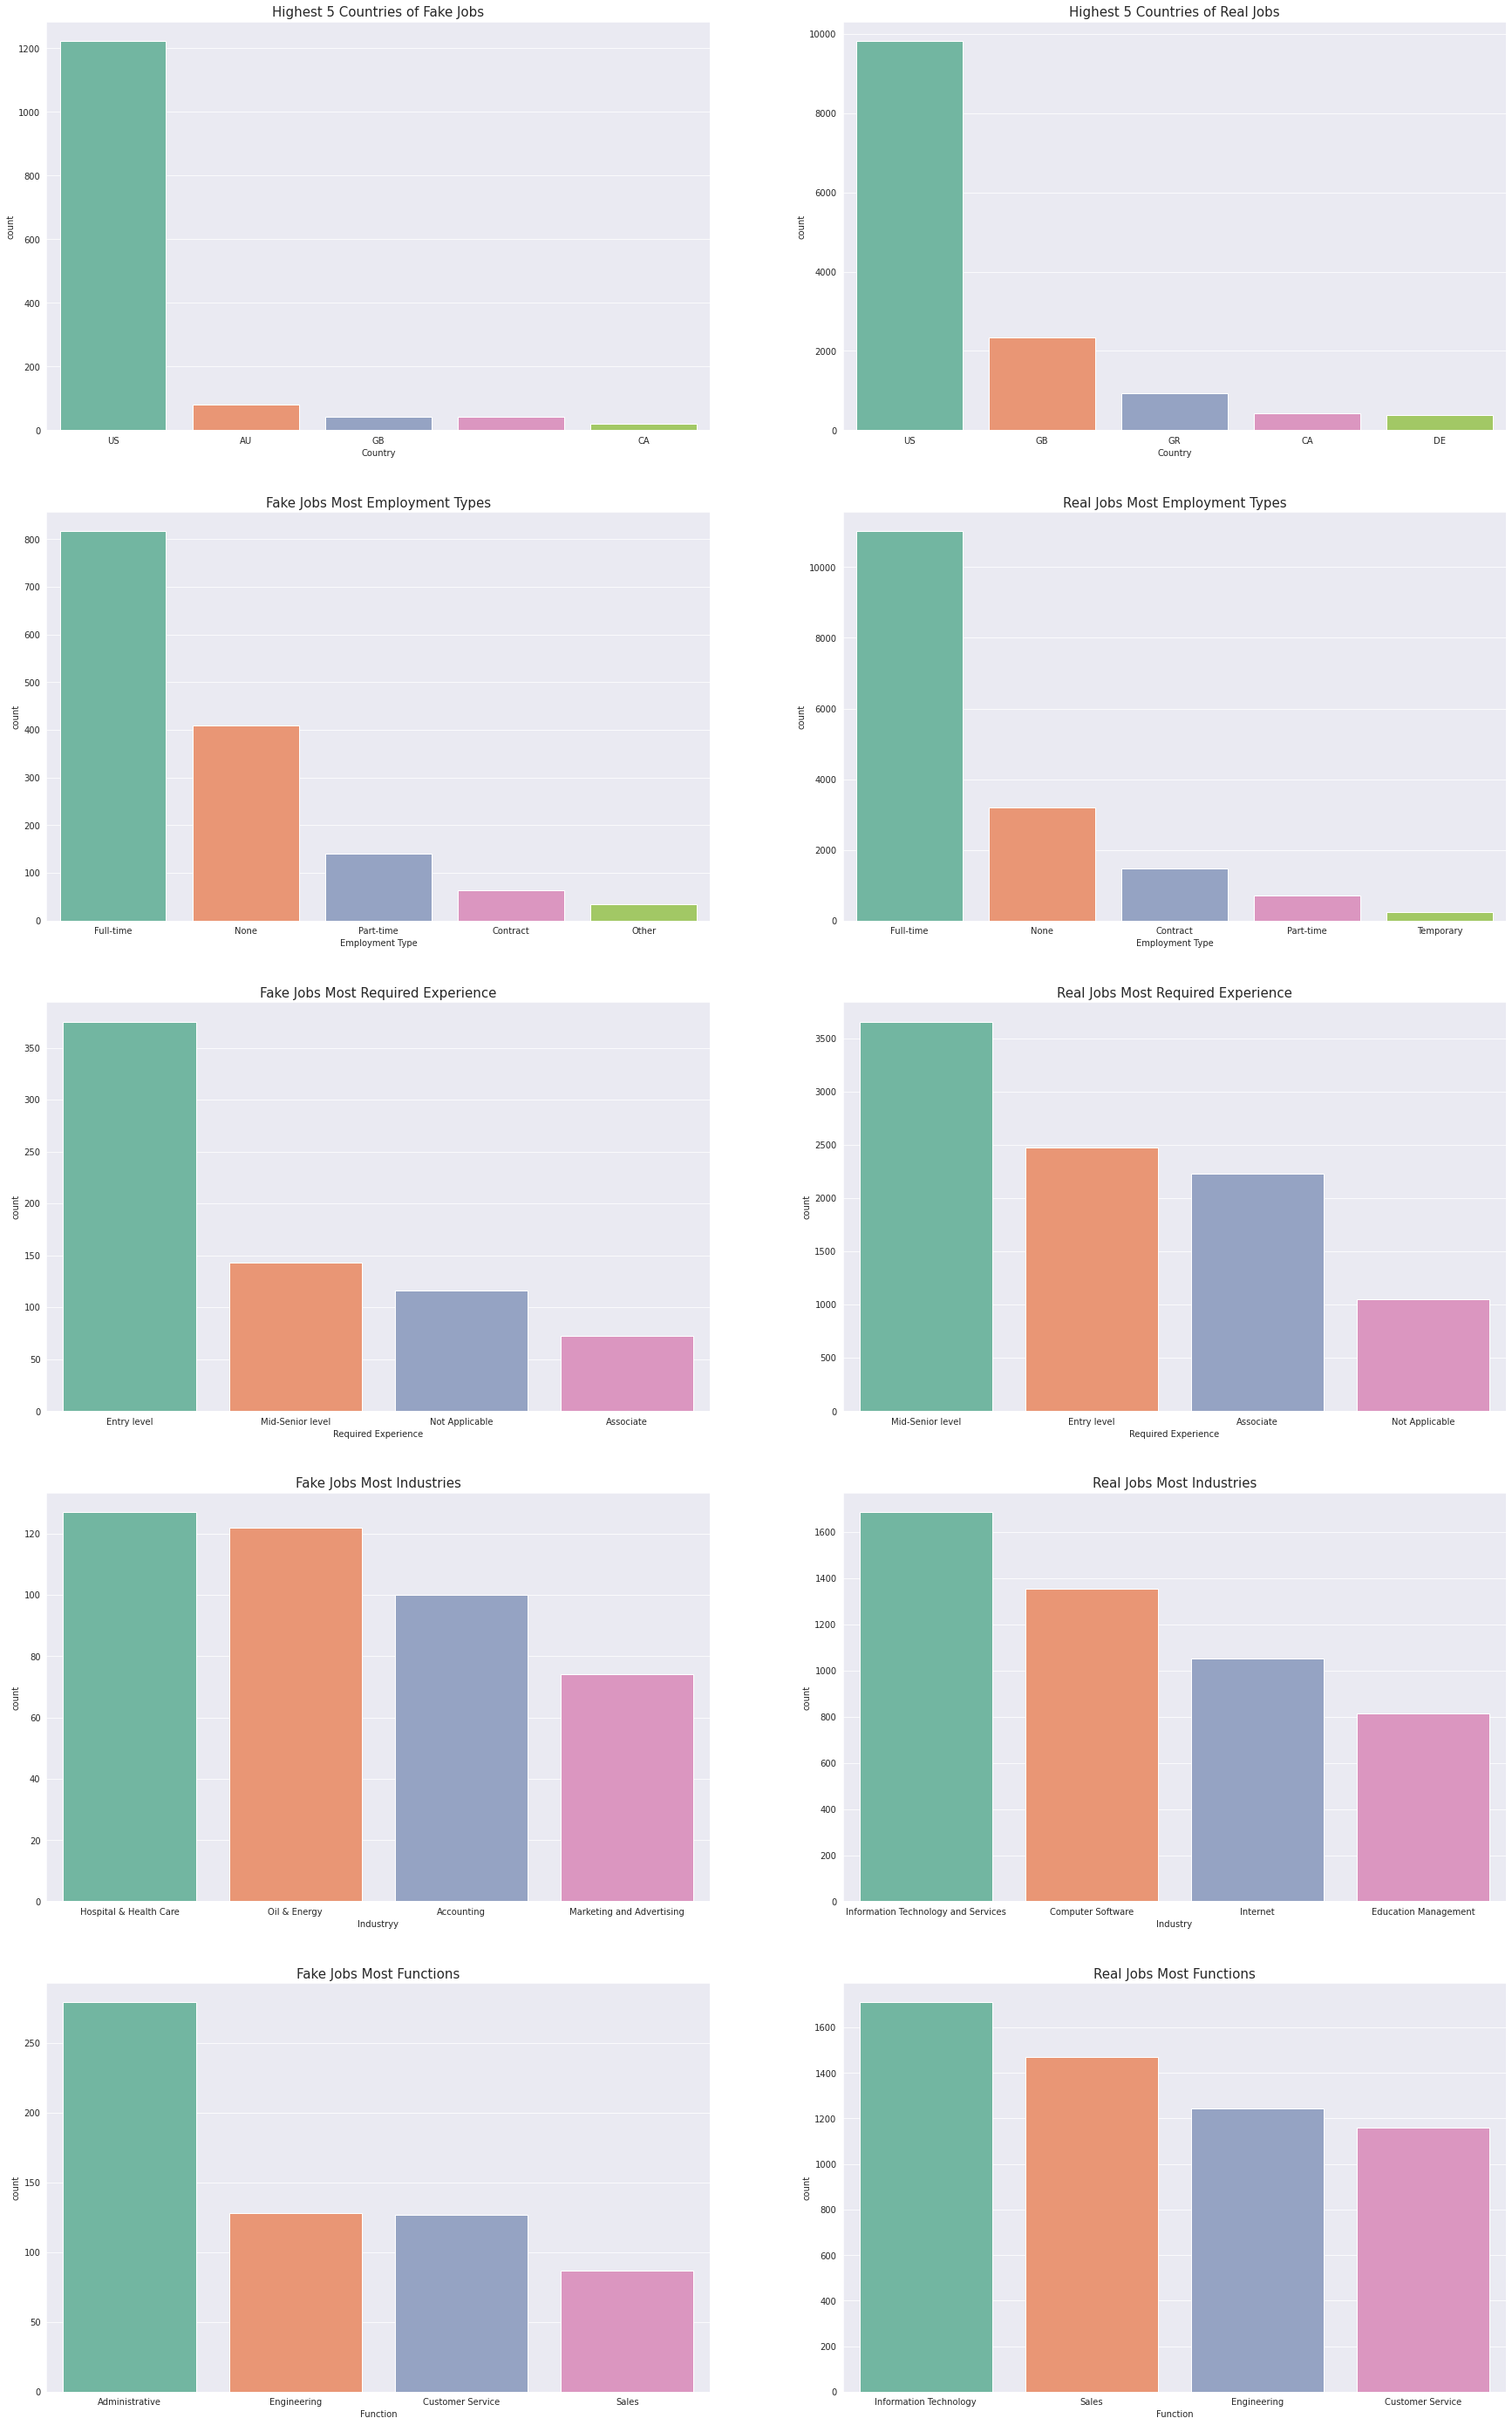

In [16]:
sns.set_style('darkgrid')
fig,axes=plt.subplots(5,2,figsize=(30,50))
sns.countplot(fakejobs['country'],palette='Set2',order = fakejobs['country'].value_counts()[:5].index,ax=axes[0,0])
sns.countplot(realjobs['country'],palette='Set2',order = realjobs['country'].value_counts()[:5].index,ax=axes[0,1])
axes[0,0].set_title('Highest 5 Countries of Fake Jobs',fontsize=15)
axes[0,1].set_title('Highest 5 Countries of Real Jobs',fontsize=15)
axes[0,0].set_xlabel('Country')
axes[0,1].set_xlabel('Country')

sns.countplot(fakejobs['employment_type'],palette='Set2',order = fakejobs['employment_type'].value_counts()[:5].index,ax=axes[1,0])
sns.countplot(realjobs['employment_type'],palette='Set2',order = realjobs['employment_type'].value_counts()[:5].index,ax=axes[1,1])
axes[1,0].set_title('Fake Jobs Most Employment Types',fontsize=15)
axes[1,1].set_title('Real Jobs Most Employment Types',fontsize=15)
axes[1,0].set_xlabel('Employment Type')
axes[1,1].set_xlabel('Employment Type')


sns.countplot(fakejobs['required_experience'],palette='Set2',order = fakejobs['required_experience'].value_counts()[1:5].index,ax=axes[2,0])
sns.countplot(realjobs['required_experience'],palette='Set2',order = realjobs['required_experience'].value_counts()[1:5].index,ax=axes[2,1])
axes[2,0].set_title('Fake Jobs Most Required Experience',fontsize=15)
axes[2,1].set_title('Real Jobs Most Required Experience',fontsize=15)
axes[2,0].set_xlabel('Required Experience')
axes[2,1].set_xlabel('Required Experience')

sns.countplot(fakejobs['industry'],palette='Set2',order = fakejobs['industry'].value_counts()[1:5].index,ax=axes[3,0])
sns.countplot(realjobs['industry'],palette='Set2',order = realjobs['industry'].value_counts()[1:5].index,ax=axes[3,1])
axes[3,0].set_title('Fake Jobs Most Industries',fontsize=15)
axes[3,1].set_title('Real Jobs Most Industries',fontsize=15)
axes[3,0].set_xlabel('Industryy')
axes[3,1].set_xlabel('Industry')

sns.countplot(fakejobs['function'],palette='Set2',order = fakejobs['function'].value_counts()[1:5].index,ax=axes[4,0])
sns.countplot(realjobs['function'],palette='Set2',order = realjobs['function'].value_counts()[1:5].index,ax=axes[4,1])
axes[4,0].set_title('Fake Jobs Most Functions',fontsize=15)
axes[4,1].set_title('Real Jobs Most Functions',fontsize=15)
axes[4,0].set_xlabel('Function')
axes[4,1].set_xlabel('Function')

# AU --> Austrilia
# GB --> United Kingdom
# GR --> Greece
# CA --> Canada
# MY --> Malaysia

Text(0.5, 0, '')

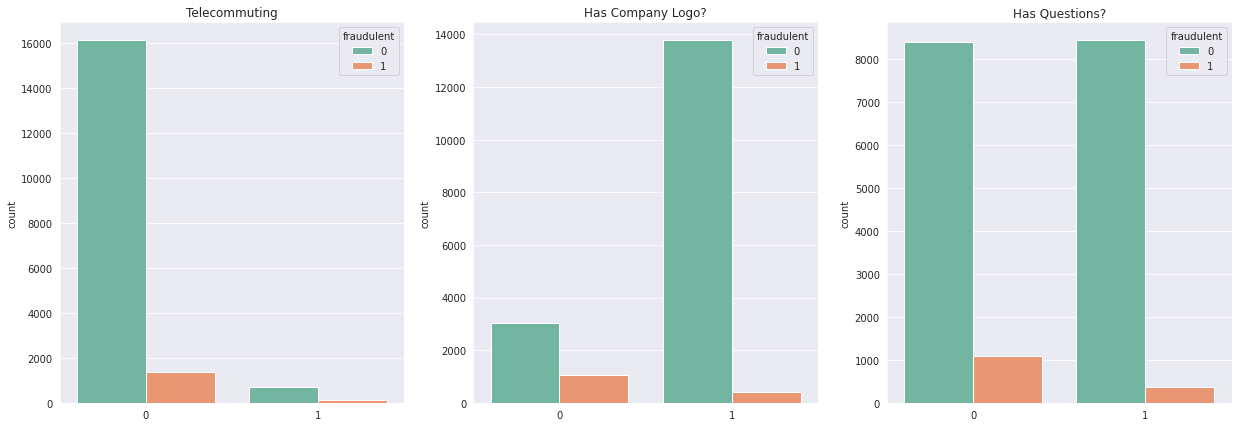

In [17]:
fig,axes=plt.subplots(1,3,figsize=(21,7))
sns.countplot(x='telecommuting', data=categ_cols, hue='fraudulent', palette='Set2',ax=axes[0]) 
sns.countplot(x='has_company_logo', data=categ_cols, hue='fraudulent', palette='Set2',ax=axes[1]) 
sns.countplot(x='has_questions', data=categ_cols, hue='fraudulent', palette='Set2',ax=axes[2]) 

axes[0].set_title('Telecommuting',fontsize=12)
axes[1].set_title('Has Company Logo?',fontsize=12)
axes[2].set_title('Has Questions?',fontsize=12)

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')

------------------------------------------------------------------------------------------


## Industries / Experience / Need

### - Top 10 industries require experience

In [18]:
exp_list=['Executive','Associate','Director','Mid-Senior level']
exp_data=categ_cols.loc[categ_cols['required_experience'].isin(exp_list)]

In [19]:
exp_data_indus=exp_data.groupby('industry')['required_experience'].value_counts(ascending=False).to_frame()
exp_data_indus.head(30)

required_experience
industry                required_experience                     
Accounting              Associate                             25
                        Mid-Senior level                      14
                        Director                               1
                        Executive                              1
Airlines/Aviation       Mid-Senior level                      24
                        Associate                             10
                        Executive                              3
                        Director                               1
Animation               Associate                              1
Apparel & Fashion       Mid-Senior level                      36
                        Associate                              9
                        Director                               6
Architecture & Planning Mid-Senior level                       3
                        Associate                              2
Automotive              Mid-Senior level                      32
                        Associate                             21
                        Director                               1
                        Executive                              1
Aviation & Aerospace    Mid-Senior level                       8
                        Associate                              5
                        Director                               5
Banking                 Associate                             34
                        Mid-Senior level                      28
                        Director                               2
                        Executive                              1
Biotechnology           Associate                             14
                        Mid-Senior level                      11
                        Director                               1
Broadcast Media         Mid-Senior level                      43
                        Associate                              4

### - What are Functions Require Experience?

In [20]:
exp_data_fun=exp_data.groupby('function')['required_experience'].value_counts(ascending=False).to_frame()
exp_data_fun.head(30)

required_experience
function              required_experience                     
Account Management    Mid-Senior level                       1
Accounting/Auditing   Associate                             57
                      Mid-Senior level                      55
                      Director                               5
                      Executive                              3
Ad Sales              Director                               1
Administrative        Associate                            112
                      Mid-Senior level                      32
                      Executive                              7
                      Director                               3
Advertising           Mid-Senior level                      30
                      Associate                             17
                      Director                               4
All                   Mid-Senior level                       1
Apps                  Executive                              1
Art Studio            Associate                              1
Art/Creative          Mid-Senior level                      42
                      Associate                             22
                      Director                               5
Broadcasting          Associate                              1
Business              Mid-Senior level                       1
Business Analyst      Mid-Senior level                      26
                      Associate                             24
                      Director                               3
Business Development  Associate                             65
                      Mid-Senior level                      57
                      Director                              15
                      Executive                              6
Business Developmment Associate                              1
CSD Technology        Mid-Senior level                       1

---------------------------------------------------------------------------------------------------------------

### - Countries with Employment Types

In [21]:
categ_cols.groupby('country')['employment_type'].value_counts(ascending=False).to_frame().head(50)

employment_type
country employment_type                 
        None                         230
        Full-time                     99
        Part-time                     14
        Contract                      12
        Other                          8
        Temporary                      2
AE      Full-time                     33
        None                          20
AL      None                           1
AM      Full-time                      2
AR      None                           5
        Full-time                      4
AT      None                           7
        Full-time                      6
        Contract                       1
AU      Full-time                    136
        Part-time                     62
        None                          36
        Contract                      10
        Other                          7
        Temporary                      3
BD      Full-time                      2
BE      Full-time                    105
        None                           5
        Temporary                      3
        Other                          2
BG      Full-time                     17
BH      None                          11
BR      Full-time                     27
        None                           6
        Contract                       2
        Other                          1
BY      Full-time                      5
        None                           4
CA      Full-time                    298
        None                          78
        Contract                      42
        Part-time                     35
        Other                          4
        Temporary                      2
CH      Full-time                     13
        None                           1
        Other                          1
CL      None                           2
CM      Full-time                      1
CN      Full-time                     10
        Contract                       3
        None                           2
CO      None                           1
CY      None                           6

------------------------------------------------------------------------------------------------------

### - Industries and Required Education

In [22]:
categ_cols.groupby('industry')['required_education'].value_counts(ascending=False).to_frame().head(50)

required_education
industry                       required_education                                   
Accounting                     None                                               86
                               High School or equivalent                          41
                               Bachelor's Degree                                  35
                               Unspecified                                        24
                               Certification                                       8
                               Master's Degree                                     2
                               Professional                                        2
                               Some College Coursework Completed                   2
Airlines/Aviation              None                                               33
                               Bachelor's Degree                                  23
                               Unspecified                                         4
                               High School or equivalent                           3
                               Master's Degree                                     1
Alternative Dispute Resolution Vocational                                          1
Animation                      None                                               11
                               Certification                                       1
                               Unspecified                                         1
Apparel & Fashion              None                                               47
                               Bachelor's Degree                                  34
                               Unspecified                                         9
                               Associate Degree                                    5
                               High School or equivalent                           5
                               Master's Degree                                     1
                               Vocational                                          1
Architecture & Planning        Bachelor's Degree                                   6
                               None                                                4
Automotive                     High School or equivalent                          29
                               Bachelor's Degree                                  27
                               Unspecified                                        27
                               None                                               24
                               Associate Degree                                    9
                               Master's Degree                                     1
                               Some College Coursework Completed                   1
                               Vocational                                          1
Aviation & Aerospace           Bachelor's Degree                                  10
                               None                                                6
                               Master's Degree                                     5
                               Professional                                        2
                               Unspecified                                         1
Banking                        High School or equivalent                          35
                               Bachelor's Degree                                  18
                               None                                               13
                               Unspecified                                         6
                               Master's Degree                                     5
                               Doctorate                                           3
                               Professional                            

--------------------------------------------------------------------------------------------------------------

- # Text Data 

## Exploring Text 

In [23]:
# As we used Country in location column as a category data
cols_to_remove=['location']
txt_cols.drop(columns=cols_to_remove,inplace=True) 

#### Cleaning Text & Removing Stopwords and Stemming 

In [24]:
stemmer=PorterStemmer()
stop=set(stopwords.words('english'))

In [25]:
def column_clean(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z\s*]','',text)
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
    return (text)
    

In [26]:
# Splitting Text Data to Fraud or Not Fraud
txt_fraud=txt_cols[txt_cols['fraudulent']==1]
txt_not_fraud=txt_cols[txt_cols['fraudulent']==0]

- #### Applying Cleaning on Title

In [27]:
txt_fraud['title']=txt_fraud['title'].apply(column_clean)
txt_not_fraud['title']=txt_not_fraud['title'].apply(column_clean)

In [28]:
def combine(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

fraud_titles = txt_fraud['title'].apply(combine)
not_fraud_titles = txt_not_fraud['title'].apply(combine)

In [29]:
fraud_titles

98                      ice technician
99                      ice technician
100                     ice technician
101                     ice technician
102                     ice technician
                     ...              
18235    student posit parttim fulltim
18236                      sale associ
18237                  android develop
18238                     payrol clerk
18239                   furnitur mover
Name: title, Length: 1469, dtype: object

In [30]:
# To List

fraud_titles_corpus=fraud_titles.values.tolist()
not_fraud_titles_corpus=not_fraud_titles.values.tolist()

In [31]:
# Corpus for WordCloud
fraud_titles_corpus=' '.join(fraud_titles_corpus)
not_fraud_titles_corpus=' '.join(not_fraud_titles_corpus)

#### Most Common Titles for Fake & Real Jobs

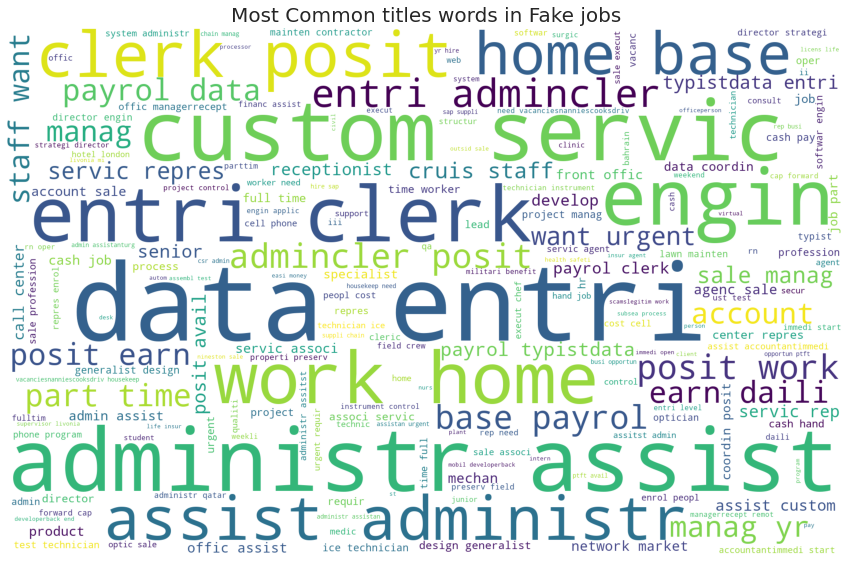

In [32]:
plt.figure(figsize=(15,10))
wordcloudfraud=WordCloud(width = 1900 , height = 1200 , background_color='white').generate(fraud_titles_corpus)
plt.axis('off')
plt.title('Most Common titles words in Fake jobs',size=20)
plt.imshow(wordcloudfraud)

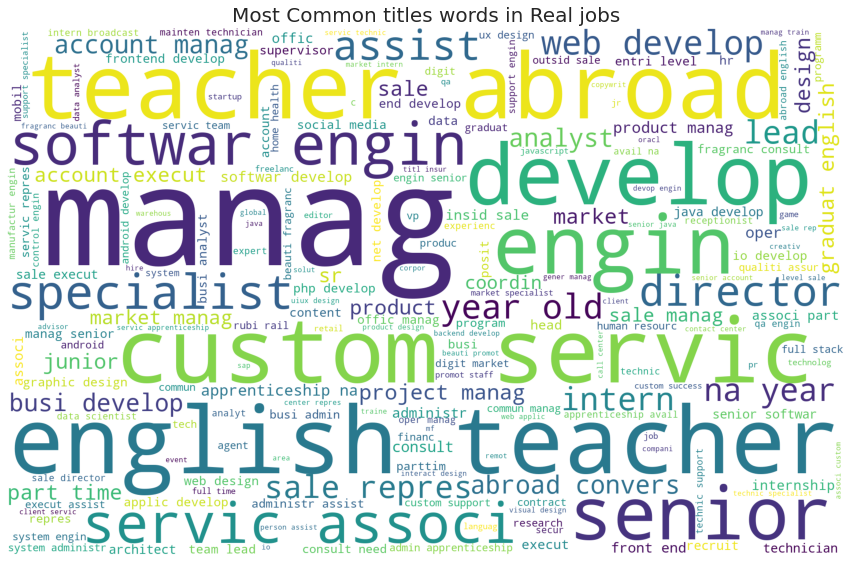

In [33]:
plt.figure(figsize=(15,10))
wordcloudnotfraud=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_titles_corpus)
plt.axis('off')
plt.title('Most Common titles words in Real jobs',size=20)
plt.imshow(wordcloudnotfraud)

Text(0.5, 1.0, 'Fake Titles Lengths')

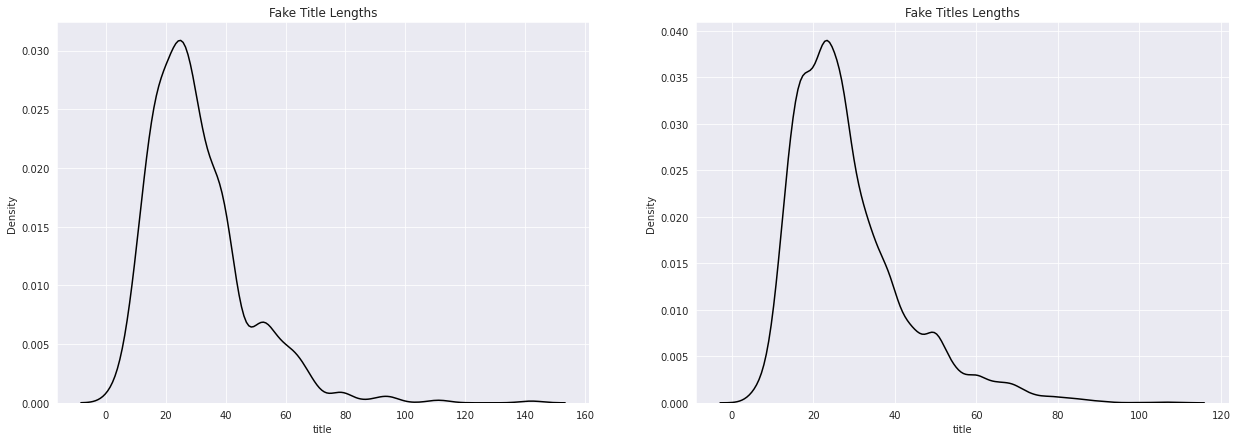

In [34]:
fraud_title_length=txt_cols[txt_cols["fraudulent"]==1]['title'].str.len()
not_fraud_title_length=txt_cols[txt_cols["fraudulent"]==0]['title'].str.len()

fig,axes=plt.subplots(1,2,figsize=(21,7))
sns.kdeplot(fraud_title_length,ax=axes[0],color='black') 
sns.kdeplot(not_fraud_title_length,ax=axes[1],color='black') 

axes[0].set_title('Fake Title Lengths',fontsize=12)
axes[1].set_title('Fake Titles Lengths',fontsize=12)



-------------------------------------------------------------------

In [35]:
txt_fraud['benefits']=txt_fraud['benefits'].apply(column_clean)
txt_not_fraud['benefits']=txt_not_fraud['benefits'].apply(column_clean)

In [36]:
fraud_benefits = txt_fraud['benefits'].apply(combine)
not_fraud_benefits = txt_not_fraud['benefits'].apply(combine)

In [37]:
# To List

fraud_benefits_corpus=fraud_benefits.values.tolist()
not_fraud_benefits_corpus=not_fraud_benefits.values.tolist()

In [38]:
# Corpus for WordCloud
fraud_benefits_corpus=' '.join(fraud_benefits_corpus)
not_fraud_benefits_corpus=' '.join(not_fraud_benefits_corpus)

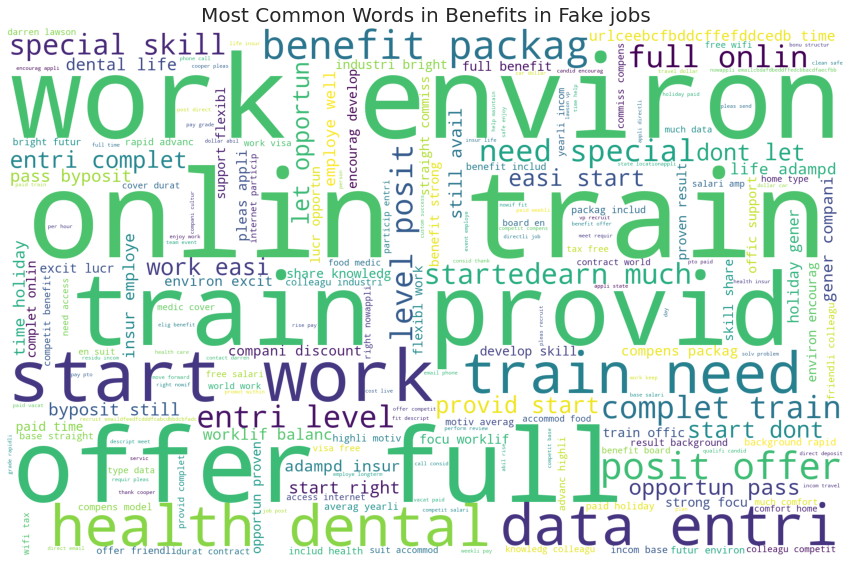

In [39]:
plt.figure(figsize=(15,10))
wordcloud_fraud_ben=WordCloud(width = 1900 , height = 1200,background_color='white').generate(fraud_benefits_corpus)
plt.axis('off')
plt.title('Most Common Words in Benefits in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_ben)

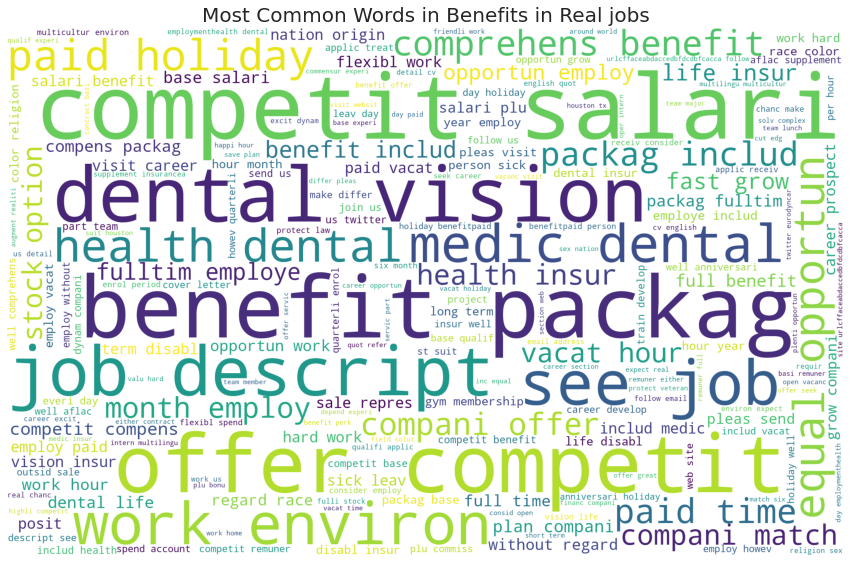

In [40]:
plt.figure(figsize=(15,10))
wordcloud_notfraudben=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_benefits_corpus)
plt.axis('off')
plt.title('Most Common Words in Benefits in Real jobs',size=20)
plt.imshow(wordcloud_notfraudben)

Text(0.5, 1.0, 'Real Benefits Lengths')

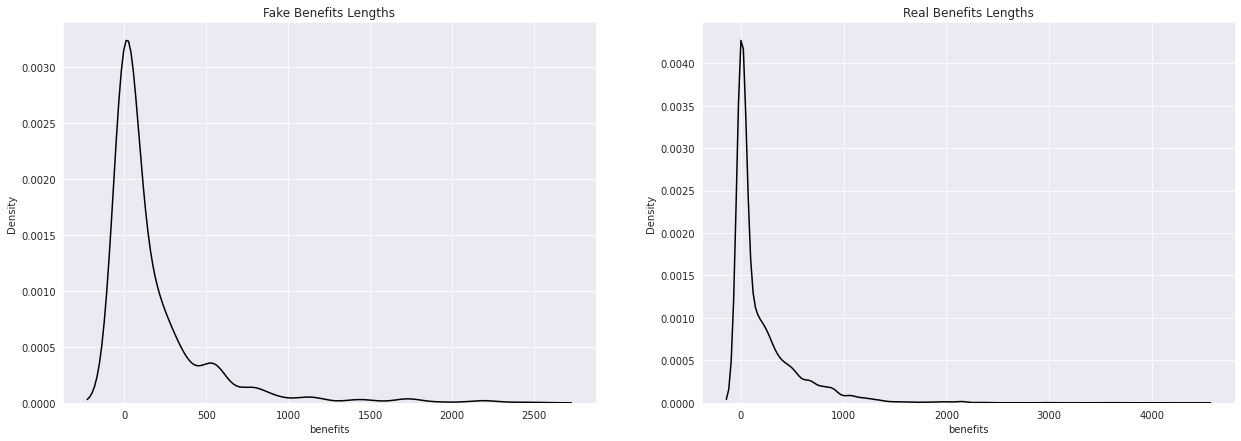

In [41]:
fraud_benefits_length=txt_cols[txt_cols["fraudulent"]==1]['benefits'].str.len()
not_fraud_benefits_length=txt_cols[txt_cols["fraudulent"]==0]['benefits'].str.len()

fig,axes=plt.subplots(1,2,figsize=(21,7))
sns.kdeplot(fraud_benefits_length,ax=axes[0],color='black') 
sns.kdeplot(not_fraud_benefits_length,ax=axes[1],color='black') 

axes[0].set_title('Fake Benefits Lengths',fontsize=12)
axes[1].set_title('Real Benefits Lengths',fontsize=12)


---------------------------------------------------------

In [42]:
txt_fraud['company_profile']=txt_fraud['company_profile'].apply(column_clean)
txt_not_fraud['company_profile']=txt_not_fraud['company_profile'].apply(column_clean)

In [43]:
fraud_company = txt_fraud['company_profile'].apply(combine)
not_fraud_company = txt_not_fraud['company_profile'].apply(combine)

In [44]:
# To List

fraud_company_corpus=fraud_company.values.tolist()
not_fraud_company_corpus=not_fraud_company.values.tolist()

In [45]:
# Corpus for WordCloud
fraud_company_corpus=' '.join(fraud_company_corpus)
not_fraud_company_corpus=' '.join(not_fraud_company_corpus)

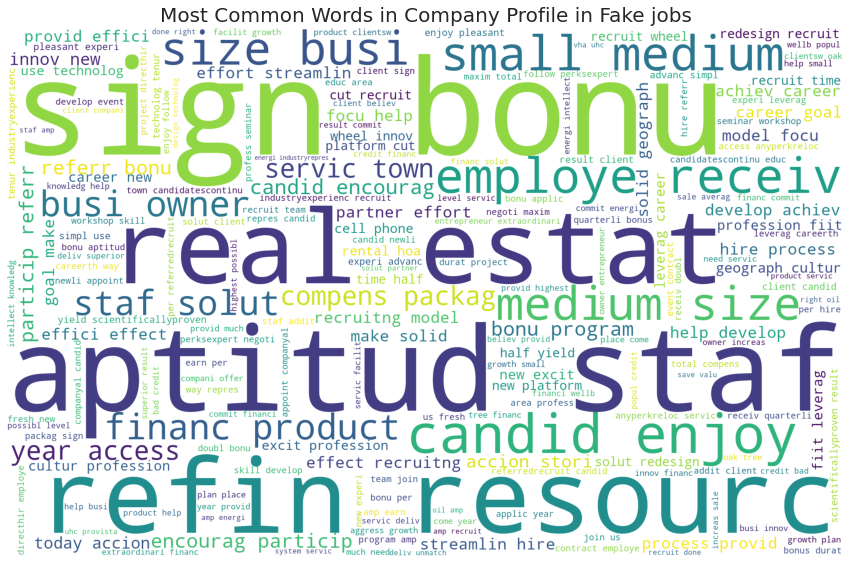

In [46]:
plt.figure(figsize=(15,10))
wordcloud_fraud_company=WordCloud(width = 1900 , height = 1200,background_color='white').generate(fraud_company_corpus)
plt.axis('off')
plt.title('Most Common Words in Company Profile in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_company)

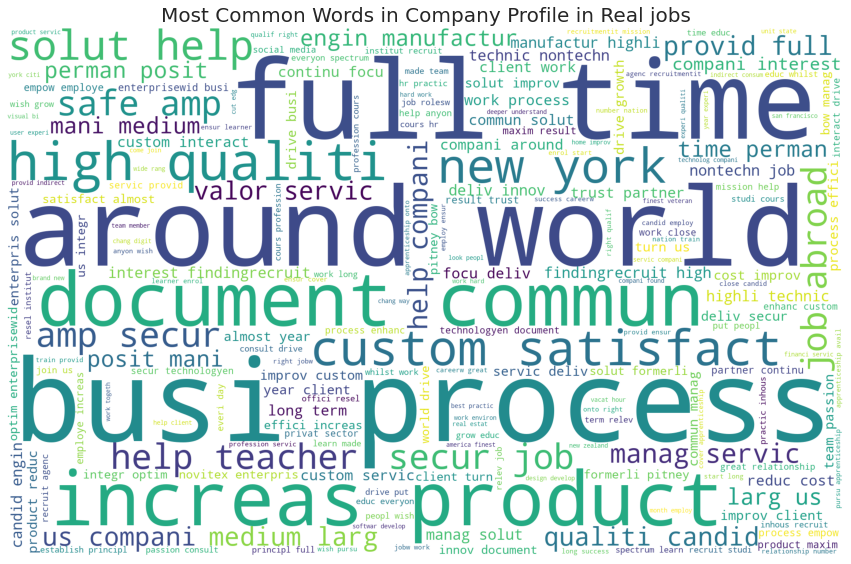

In [47]:
plt.figure(figsize=(15,10))
wordcloud_not_fraud_company=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_company_corpus)
plt.axis('off')
plt.title('Most Common Words in Company Profile in Real jobs',size=20)
plt.imshow(wordcloud_not_fraud_company)

Text(0.5, 1.0, 'Real Company Profile Lengths?')

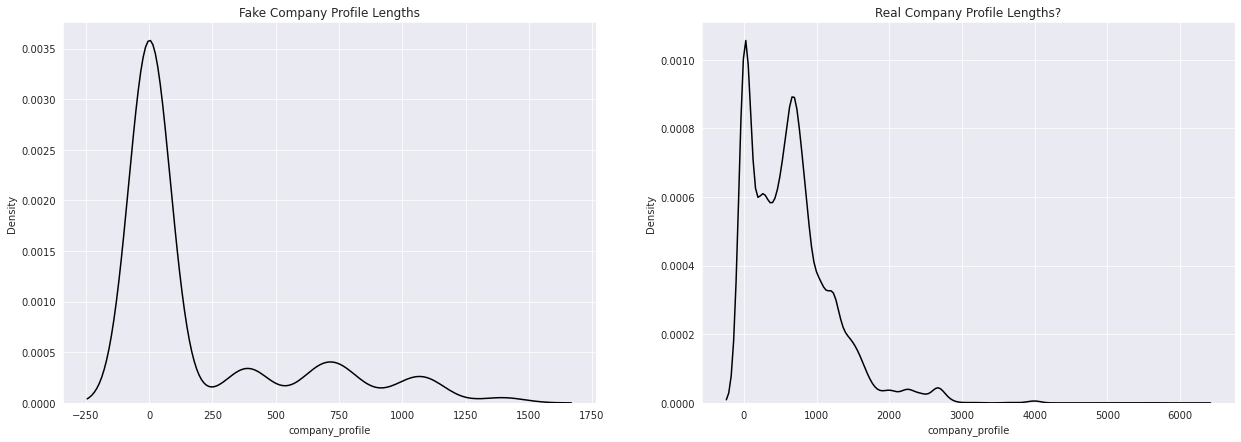

In [48]:
fraud_company_length=txt_cols[txt_cols["fraudulent"]==1]['company_profile'].str.len()
not_fraud_company_length=txt_cols[txt_cols["fraudulent"]==0]['company_profile'].str.len()

fig,axes=plt.subplots(1,2,figsize=(21,7))
sns.kdeplot(fraud_company_length,ax=axes[0],color='black') 
sns.kdeplot(not_fraud_company_length,ax=axes[1],color='black') 

axes[0].set_title('Fake Company Profile Lengths',fontsize=12)
axes[1].set_title('Real Company Profile Lengths?',fontsize=12)


-----------------------------------------------

In [49]:
txt_fraud['requirements']=txt_fraud['requirements'].apply(column_clean)
txt_not_fraud['requirements']=txt_not_fraud['requirements'].apply(column_clean)


In [50]:
fraud_requirements = txt_fraud['requirements'].apply(combine)
not_fraud_requirements = txt_not_fraud['requirements'].apply(combine)

In [51]:
# To List

fraud_requirements_corpus=fraud_requirements.values.tolist()
not_fraud_requirements_corpus=not_fraud_requirements.values.tolist()

In [52]:
# Corpus for WordCloud
fraud_requirements_corpus=' '.join(fraud_requirements_corpus)
not_fraud_requirements_corpus=' '.join(not_fraud_requirements_corpus)

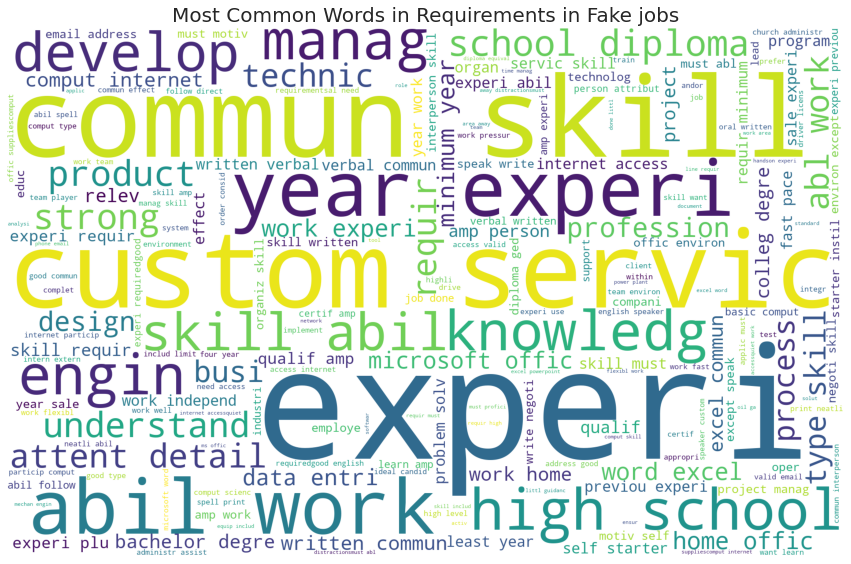

In [53]:
plt.figure(figsize=(15,10))
wordcloud_fraud_requirements=WordCloud(width = 1900 , height = 1200,background_color='white').generate(fraud_requirements_corpus)
plt.axis('off')
plt.title('Most Common Words in Requirements in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_requirements)

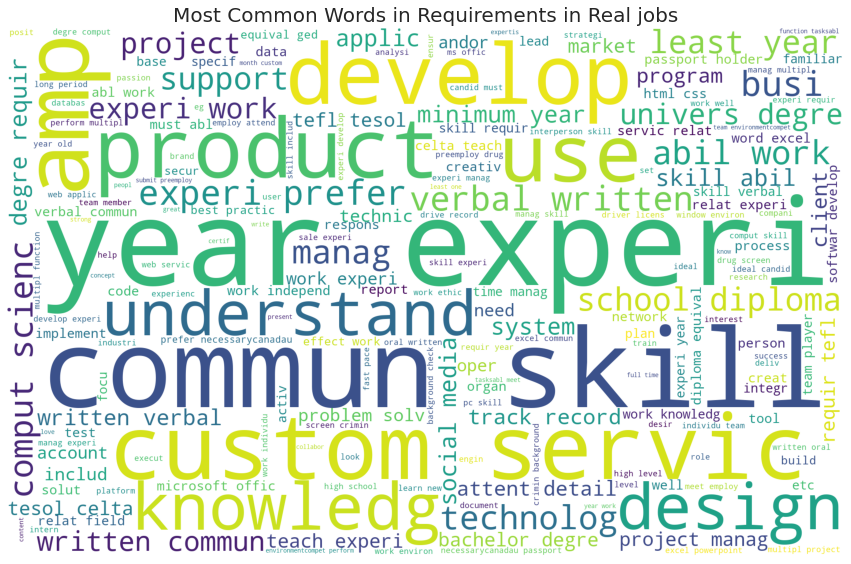

In [54]:
plt.figure(figsize=(15,10))
wordcloud_notfraud_requirements=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_requirements_corpus)
plt.axis('off')
plt.title('Most Common Words in Requirements in Real jobs',size=20)
plt.imshow(wordcloud_notfraud_requirements)

----------------------------------------

In [55]:
data=txt_cols.join(categ_cols.drop(columns='fraudulent'))

In [56]:
data['text']=data['title'] +' '+data['benefits']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']
colm=['title','benefits','company_profile','description','requirements']
data.drop(columns=colm,inplace=True)

In [57]:
data['text']=data['text'].apply(column_clean)

In [58]:
data['text']=data['text'].apply(combine)

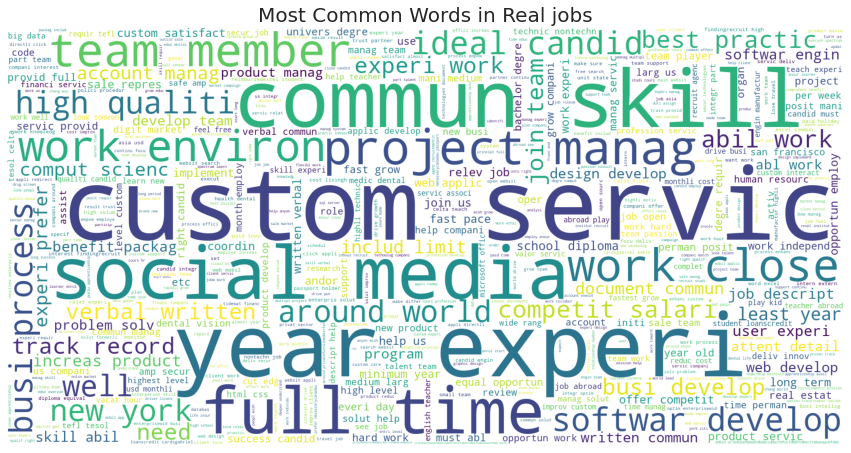

In [59]:
plt.figure(figsize = (15,10)) 
wordcloud_real = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='white').generate(" ".join(data[data['fraudulent'] == 0]['text']))
plt.axis('off')
plt.title('Most Common Words in Real jobs',size=20)
plt.imshow(wordcloud_real)

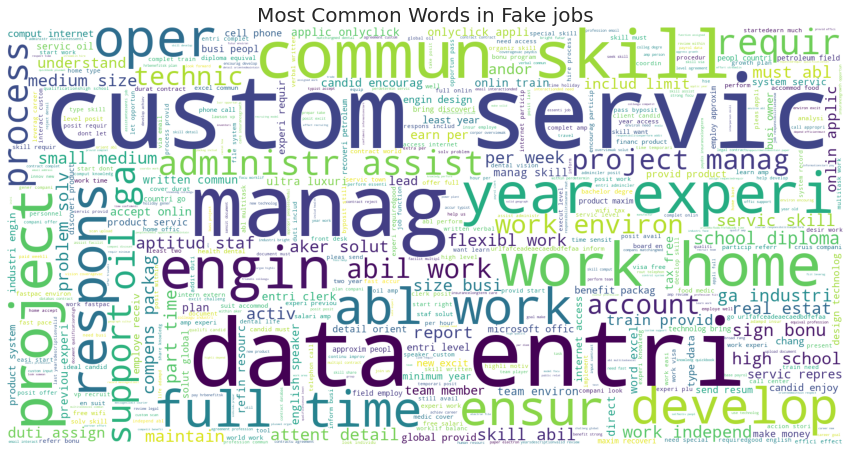

In [60]:
plt.figure(figsize = (15,10)) 
wordcloud_fake = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='white').generate(" ".join(data[data['fraudulent'] == 1]['text']))
plt.axis('off')
plt.title('Most Common Words in Fake jobs',size=20)
plt.imshow(wordcloud_fake)

In [61]:
x=data.drop(columns='fraudulent')
y=data['fraudulent']

In [62]:
# Applying Count Vectorizer
count_vec = CountVectorizer(max_features=5000)
vec = count_vec.fit_transform(data['text'])


In [63]:
text=pd.DataFrame(vec.toarray(),columns=count_vec.get_feature_names_out())

In [64]:
labels=pd.get_dummies(x.drop(columns='text'))
result = pd.concat([labels, text], axis=1)

In [65]:
# Splitting data to train and test
x_train,x_test,y_train,y_test=train_test_split(result,y,test_size=0.2,random_state=42,stratify=y)

In [66]:
# Naive Bayes
nb=MultinomialNB()
nb.fit(x_train,y_train)
nb_y_pred=nb.predict(x_test)

        Training Classification report for Naive Bayes 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     13455
           1       0.53      0.92      0.67      1175

    accuracy                           0.93     14630
   macro avg       0.76      0.92      0.82     14630
weighted avg       0.96      0.93      0.94     14630

        Testing Classification Report for Naive Bayes 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      3364
           1       0.49      0.87      0.63       294

    accuracy                           0.92      3658
   macro avg       0.74      0.89      0.79      3658
weighted avg       0.95      0.92      0.93      3658

        Confusion Matrix for Training Naive Bayes 
        Confusion Matrix for Testing Naive Bayes 


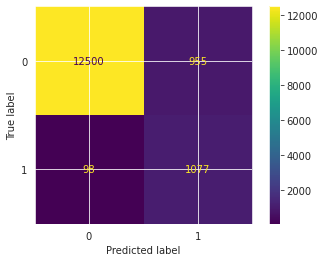

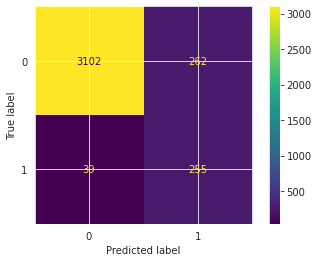

In [67]:
print('        Training Classification report for Naive Bayes \n',classification_report(y_train,nb.predict(x_train)))
print('        Testing Classification Report for Naive Bayes \n',classification_report(y_test,nb_y_pred))

print('        Confusion Matrix for Training Naive Bayes \n',plot_confusion_matrix(nb,x_train,y_train))
print('        Confusion Matrix for Testing Naive Bayes \n',plot_confusion_matrix(nb,x_test,y_test))

In [68]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_y_pred=lr.predict(x_test)

        Training Classification report for Logistic Regression 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13455
           1       1.00      1.00      1.00      1175

    accuracy                           1.00     14630
   macro avg       1.00      1.00      1.00     14630
weighted avg       1.00      1.00      1.00     14630

        Testing Classification Report for Logistion Regression 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3364
           1       0.92      0.89      0.91       294

    accuracy                           0.99      3658
   macro avg       0.96      0.94      0.95      3658
weighted avg       0.99      0.99      0.99      3658

        Confusion Matrix for Training Logistic Regression 
        Confusion Matrix for Testing Logistic Regression 


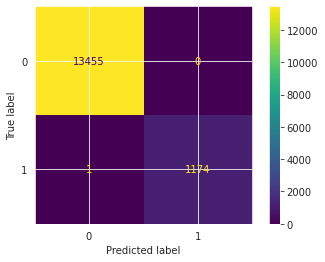

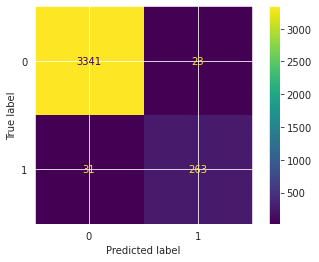

In [69]:
print('        Training Classification report for Logistic Regression \n',classification_report(y_train,lr.predict(x_train)))
print('        Testing Classification Report for Logistion Regression \n',classification_report(y_test,lr_y_pred))

print('        Confusion Matrix for Training Logistic Regression \n',plot_confusion_matrix(lr,x_train,y_train))
print('        Confusion Matrix for Testing Logistic Regression \n',plot_confusion_matrix(lr,x_test,y_test))

Training Classification report for KNN:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     13455
           1       0.67      0.58      0.62      1175

    accuracy                           0.94     14630
   macro avg       0.82      0.78      0.80     14630
weighted avg       0.94      0.94      0.94     14630

Testing Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3364
           1       0.66      0.62      0.64       294

    accuracy                           0.94      3658
   macro avg       0.81      0.79      0.80      3658
weighted avg       0.94      0.94      0.94      3658

Confusion Matrix for Training KNN:
Confusion Matrix for Testing KNN:


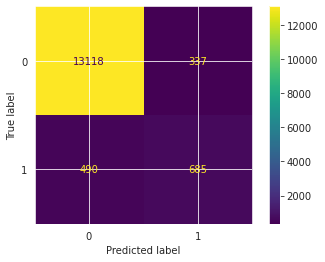

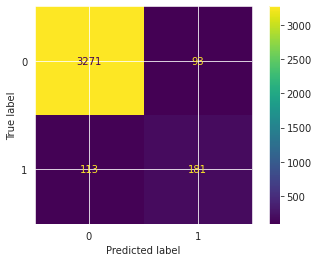

In [70]:

k = 50  # set the value of k to 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
knn_y_pred = knn.predict(x_test)

# print the classification reports for training and testing
print('Training Classification report for KNN:\n', classification_report(y_train, knn.predict(x_train)))
print('Testing Classification Report for KNN:\n', classification_report(y_test, knn_y_pred))

# plot the confusion matrices for training and testing
print('Confusion Matrix for Training KNN:\n', plot_confusion_matrix(knn, x_train, y_train))
print('Confusion Matrix for Testing KNN:\n', plot_confusion_matrix(knn, x_test, y_test))

Training Classification report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13455
           1       1.00      1.00      1.00      1175

    accuracy                           1.00     14630
   macro avg       1.00      1.00      1.00     14630
weighted avg       1.00      1.00      1.00     14630

Testing Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3364
           1       1.00      0.83      0.91       294

    accuracy                           0.99      3658
   macro avg       0.99      0.91      0.95      3658
weighted avg       0.99      0.99      0.99      3658

Confusion Matrix for Training Random Forest Classifier:
Confusion Matrix for Testing Random Forest Classifier:


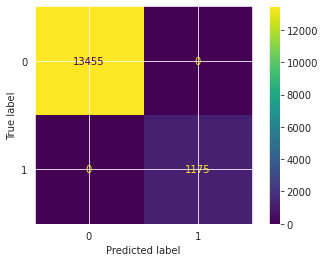

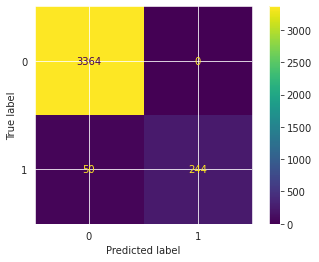

In [71]:

n_trees = 100  # set the number of trees to 50
rf = RandomForestClassifier(n_estimators=n_trees)
rf.fit(x_train, y_train)
rf_y_pred = rf.predict(x_test)

# print the classification reports for training and testing
print('Training Classification report for Random Forest Classifier:\n',classification_report(y_train, rf.predict(x_train)))
print('Testing Classification Report for Random Forest Classifier:\n',classification_report(y_test, rf_y_pred))

# plot the confusion matrices for training and testing
print('Confusion Matrix for Training Random Forest Classifier:\n', plot_confusion_matrix(rf, x_train, y_train))
print('Confusion Matrix for Testing Random Forest Classifier:\n', plot_confusion_matrix(rf, x_test, y_test))


Training Classification report for SVM Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13455
           1       1.00      1.00      1.00      1175

    accuracy                           1.00     14630
   macro avg       1.00      1.00      1.00     14630
weighted avg       1.00      1.00      1.00     14630

Testing Classification Report for SVM Classifier:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3364
           1       1.00      0.83      0.91       294

    accuracy                           0.99      3658
   macro avg       0.99      0.91      0.95      3658
weighted avg       0.99      0.99      0.99      3658

Confusion Matrix for Training SVM Classifier:
Confusion Matrix for Testing SVM Classifier:


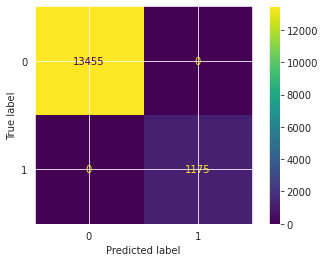

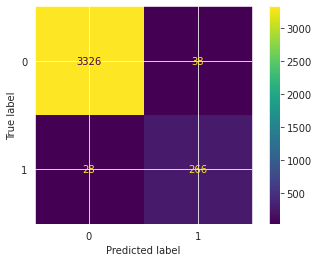

In [72]:
#svm
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
clf_y_pred = rf.predict(x_test)

# print the classification reports for training and testing
print('Training Classification report for SVM Classifier:\n',classification_report(y_train, clf.predict(x_train)))
print('Testing Classification Report for SVM Classifier:\n',classification_report(y_test, clf_y_pred))

# plot the confusion matrices for training and testing
print('Confusion Matrix for Training SVM Classifier:\n', plot_confusion_matrix(clf, x_train, y_train))
print('Confusion Matrix for Testing SVM Classifier:\n', plot_confusion_matrix(clf, x_test, y_test))